# PréProcessing NLP 

### Import des Librairies

In [1]:
import sklearn
import wordcloud
import itertools
import matplotlib
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import re
import itertools as it
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from graphviz import Digraph

In [2]:
print(pd.__version__)
print(np.__version__)
print(re.__version__)
#print(it.__version__)
print(nltk.__version__)
print(xgb.__version__)
print(sklearn.__version__)
print(wordcloud.__version__)
print(matplotlib.__version__)

1.0.3
1.18.1
2.2.1
3.5
1.1.0
0.22.1
1.7.0
3.1.3


### Travail à partir d'un échantillon de données pris manuellement

Création d'une dataframe avec les données

In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/Al_Ce/Desktop/IA/visualwebapp/flask/projet nlp/reviews_hotels.csv')

In [4]:
df

,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,Appi hôtel à éviter absolument. Chambre pas fa...,1
1,1,Appi Hotel,Horrible ne jamais y mettre les pieds...a bani...,1
2,2,Appi Hotel,"Hotel bruyant, miteux qu'il faut fuir !!! Douc...",1
3,3,Appi Hotel,J’ai réservé plus de 4 mois à l’avance et lors...,1
4,4,Appi Hotel,Hôtel dont les chambres sont confortables et a...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,Nous avons adoré le Rancho Bernardo ! Après de...,0
53934,11137,Hotel_Relais_Bosquet_Paris,Mon mari et moi-même avons séjourné à l'hôtel ...,0
53935,11138,Hotel_Relais_Bosquet_Paris,Ma fille et moi-même rentrons de notre séjour ...,0
53936,11139,Hotel_Relais_Bosquet_Paris,Mon mari et moi avons séjourné dans cet hôtel ...,0


In [5]:
df

,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,Appi hôtel à éviter absolument. Chambre pas fa...,1
1,1,Appi Hotel,Horrible ne jamais y mettre les pieds...a bani...,1
2,2,Appi Hotel,"Hotel bruyant, miteux qu'il faut fuir !!! Douc...",1
3,3,Appi Hotel,J’ai réservé plus de 4 mois à l’avance et lors...,1
4,4,Appi Hotel,Hôtel dont les chambres sont confortables et a...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,Nous avons adoré le Rancho Bernardo ! Après de...,0
53934,11137,Hotel_Relais_Bosquet_Paris,Mon mari et moi-même avons séjourné à l'hôtel ...,0
53935,11138,Hotel_Relais_Bosquet_Paris,Ma fille et moi-même rentrons de notre séjour ...,0
53936,11139,Hotel_Relais_Bosquet_Paris,Mon mari et moi avons séjourné dans cet hôtel ...,0


In [6]:
dict_for_replace = {50: 0, 40: 0, 30: 1, 20: 1, 10:1}
df = df.replace({"note": dict_for_replace})
df


,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,Appi hôtel à éviter absolument. Chambre pas fa...,1
1,1,Appi Hotel,Horrible ne jamais y mettre les pieds...a bani...,1
2,2,Appi Hotel,"Hotel bruyant, miteux qu'il faut fuir !!! Douc...",1
3,3,Appi Hotel,J’ai réservé plus de 4 mois à l’avance et lors...,1
4,4,Appi Hotel,Hôtel dont les chambres sont confortables et a...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,Nous avons adoré le Rancho Bernardo ! Après de...,0
53934,11137,Hotel_Relais_Bosquet_Paris,Mon mari et moi-même avons séjourné à l'hôtel ...,0
53935,11138,Hotel_Relais_Bosquet_Paris,Ma fille et moi-même rentrons de notre séjour ...,0
53936,11139,Hotel_Relais_Bosquet_Paris,Mon mari et moi avons séjourné dans cet hôtel ...,0



Préprocessing : nettoyer les données. 
Comme le travail se fait sur des commentaires il faut enlever tout ce qui ne serait pas utile pour déterminer l'avis d'un commentaire. Y compris dans un premier temps la ponctuation. 

In [7]:
def sup_ponctuations(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    return pas_de_ponc.lower()

In [8]:
com1 = "Accueil excecrable, le prix d un trois étoiles, le servie du hotel une étoile! A bannir."

In [9]:
sup_ponctuations(com1)

'accueil excecrable le prix d un trois étoiles le servie du hotel une étoile a bannir'

In [10]:
df["commentaire"] = df["commentaire"].apply(sup_ponctuations)

In [11]:
df

,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,appi hôtel à éviter absolument chambre pas fai...,1
1,1,Appi Hotel,horrible ne jamais y mettre les piedsa banir d...,1
2,2,Appi Hotel,hotel bruyant miteux quil faut fuir douche et...,1
3,3,Appi Hotel,j’ai réservé plus de 4 mois à l’avance et lors...,1
4,4,Appi Hotel,hôtel dont les chambres sont confortables et a...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,nous avons adoré le rancho bernardo après de ...,0
53934,11137,Hotel_Relais_Bosquet_Paris,mon mari et moimême avons séjourné à lhôtel 20...,0
53935,11138,Hotel_Relais_Bosquet_Paris,ma fille et moimême rentrons de notre séjour à...,0
53936,11139,Hotel_Relais_Bosquet_Paris,mon mari et moi avons séjourné dans cet hôtel ...,0


Ensuite enlever tous les éléments essentiels à des phrases mais inutiles ici dans le cadre de la détection d'un bon ou d'un mauvais commentaire en utilisant la librairie nltk avec la fonction stopwords. 
Pour en savoir plus veuillez consultez la liste des mots que stopwords définit comme étant inutile dans le cadre d'un projet de nlp https://countwordsfree.com/stopwords/french.

In [12]:
def mots_inutiles(commentaires):
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in commentaires.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés

In [13]:
def com_preproc(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in pas_de_ponc.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés        

In [14]:
df["commentaire"] = df["commentaire"].apply(mots_inutiles)

In [15]:
df

,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,appi hôtel éviter absolument chambre faite 6 ...,1
1,1,Appi Hotel,horrible jamais mettre piedsa banir durgence ...,1
2,2,Appi Hotel,hotel bruyant miteux quil faut fuir douche wc...,1
3,3,Appi Hotel,j’ai réservé plus 4 mois l’avance lorsque j’a...,1
4,4,Appi Hotel,hôtel dont chambres confortables agréables ce...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,adoré rancho bernardo après nombreuses recher...,0
53934,11137,Hotel_Relais_Bosquet_Paris,mari moimême séjourné lhôtel 2003 sept jai ad...,0
53935,11138,Hotel_Relais_Bosquet_Paris,fille moimême rentrons séjour lhôtel relais b...,0
53936,11139,Hotel_Relais_Bosquet_Paris,mari séjourné cet hôtel quatre jours septembr...,0


Agrégation des fonctions en une seule. 

In [16]:
def com_preproc(commentaires):
    ponctuations = '''!()-[]{};:'"\,./?@#$%^&@*_~'''
    pas_de_ponc = ""
    for carac in commentaires:
        if carac not in ponctuations:
            pas_de_ponc = pas_de_ponc + carac
    mots = stopwords.words('french')
    comm_nettoyés = ""
    for mot in pas_de_ponc.split():
        if mot not in mots:
            comm_nettoyés = comm_nettoyés + ' ' + mot
    return comm_nettoyés 

In [17]:
df["commentaire"] = df["commentaire"].apply(com_preproc)

In [18]:
df

,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,appi hôtel éviter absolument chambre faite 6 ...,1
1,1,Appi Hotel,horrible jamais mettre piedsa banir durgence ...,1
2,2,Appi Hotel,hotel bruyant miteux quil faut fuir douche wc...,1
3,3,Appi Hotel,j’ai réservé plus 4 mois l’avance lorsque j’a...,1
4,4,Appi Hotel,hôtel dont chambres confortables agréables ce...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,adoré rancho bernardo après nombreuses recher...,0
53934,11137,Hotel_Relais_Bosquet_Paris,mari moimême séjourné lhôtel 2003 sept jai ad...,0
53935,11138,Hotel_Relais_Bosquet_Paris,fille moimême rentrons séjour lhôtel relais b...,0
53936,11139,Hotel_Relais_Bosquet_Paris,mari séjourné cet hôtel quatre jours septembr...,0


In [19]:
nombre_évaluation = df["note"].value_counts()
nombre_évaluation

0    40250
1    13688
Name: note, dtype: int64

Une fois qu'on a éliminé le superflu dans les commentaires il faut réussir à transformer tout cela en valeur numériques afin de pouvoir faire des prédictions. Pour cela sklearn met à disposition la librairie extraction_text et la fonction associée countvectorizer qui va assigner à chaque mot en les découpant dans toutes les phrases un numéro. http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/artificiel_tokenize_features.html

In [20]:
messages_bow = CountVectorizer(analyzer=com_preproc).fit_transform(df['commentaire'])

In [21]:
#messages_bow.todense()

Analyser l'occurence des mots dans les commentaires là on a pris l'ensemble des commentaires indépendamment qu'ils soient bons ou mauvais. A la suite de cette première analyse et afin de voir quelles sont les différences nous ferons ce même graphiques mais avec un mask concernant les commentaires.

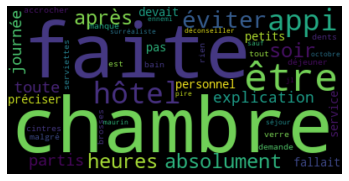

In [22]:
text = df.commentaire[0]

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
plt.axis("off")
plt.show()

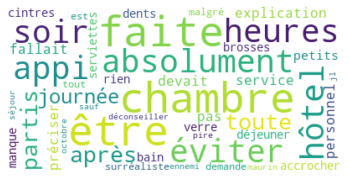

In [23]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear", cmap="coolwarm")
plt.axis("off")
plt.show()

In [24]:
text = " ".join(commentaires for commentaires in df.commentaire)
print ("Il y a {} de mots dans les commentaires pris.".format(len(text)))

Il y a 17498991 de mots dans les commentaires pris.


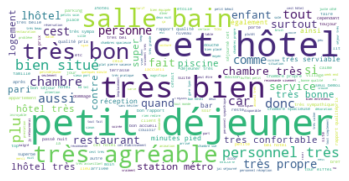

In [25]:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
plt.axis("off")
plt.show()

In [26]:
comms_bons = df.loc[(df['note'] == 0)]
comms_bons.reset_index(drop=True)
comms_bons


,Unnamed: 0,hotel,commentaire,note
4,4,Appi Hotel,hôtel dont chambres confortables agréables ce...,0
10,10,Appi Hotel,petit hôtel paie mine accueil sympa quartier ...,0
16,16,Appi Hotel,tout dabord accueil personnel tres chaleureux...,0
21,21,Appi Hotel,we prolongé paris opté hôtel central proximit...,0
22,22,Appi Hotel,chambres propres rapport qualité prix incompa...,0
...,...,...,...,...
53933,11136,Hotel_Relais_Bosquet_Paris,adoré rancho bernardo après nombreuses recher...,0
53934,11137,Hotel_Relais_Bosquet_Paris,mari moimême séjourné lhôtel 2003 sept jai ad...,0
53935,11138,Hotel_Relais_Bosquet_Paris,fille moimême rentrons séjour lhôtel relais b...,0
53936,11139,Hotel_Relais_Bosquet_Paris,mari séjourné cet hôtel quatre jours septembr...,0


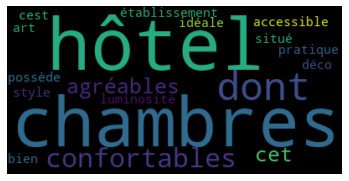

In [27]:
text_bons = comms_bons.commentaire[4]

wordcloud = WordCloud().generate(text_bons)
plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
plt.axis("off")
plt.show()

In [28]:
comms_mauvais = df.loc[(df['note'] == 1)]
comms_mauvais


,Unnamed: 0,hotel,commentaire,note
0,0,Appi Hotel,appi hôtel éviter absolument chambre faite 6 ...,1
1,1,Appi Hotel,horrible jamais mettre piedsa banir durgence ...,1
2,2,Appi Hotel,hotel bruyant miteux quil faut fuir douche wc...,1
3,3,Appi Hotel,j’ai réservé plus 4 mois l’avance lorsque j’a...,1
5,5,Appi Hotel,hôtel travaux aucune règles sécurité chambre ...,1
...,...,...,...,...
53793,10996,Hotel_Relais_Bosquet_Paris,22 23 août 2011 restés ici deux nuits comment...,1
53794,10997,Hotel_Relais_Bosquet_Paris,préparé taille chambre paris prix élevés dy a...,1
53899,11102,Hotel_Relais_Bosquet_Paris,séjourné lhôtel relais bosquet raison dun con...,1
53902,11105,Hotel_Relais_Bosquet_Paris,cétait deuxième fois allions paris cette fois...,1


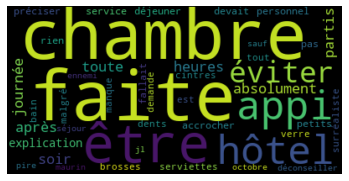

In [29]:
text_mauvais = comms_mauvais.commentaire[0]

wordcloud = WordCloud().generate(text_mauvais)
plt.imshow(wordcloud, interpolation='bilinear', cmap="coolwarm")
plt.axis("off")
plt.show()

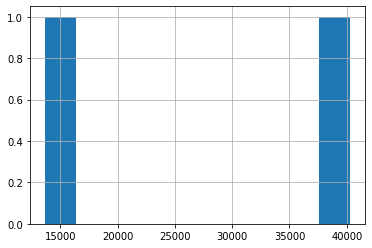

In [30]:
df.note.value_counts().hist()

Ainsi nous pouvons que les mots récurrents change en fonctions de si le commentaire a mis une bonne évaluation ou pas c'est pourquoi l'étape de la prédiction consiste tout simplement à définir si le commentaire est positive ou négative en fonction de l'occurence d'un mot. 

## Naives Bayes. 

Ici on a choisi de prendre l'algo de classification de Naives bayes pour deux raisons la première c'est que cet algo est utilisé pour de la classification or nous cherchons à déterminer les bons et mauvais commentaires. Deuxièmement il s'agit ici de données scrappés d'un certain nombre or il conviendrait que ce soit cet algo qui soit le plus à même de faire des meilleures prédictions dans de telles configuration.
https://www.google.com/search?q=choix+algo+sklearn&client=firefox-b-d&sxsrf=ALeKk01NkMgu1_ohsWZs4auhwHXqgbXNSg:1590656994605&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiVsf2Im9bpAhUNJhoKHWPACk8Q_AUoAXoECAwQAw&biw=1920&bih=966#imgrc=BxrGpsOIhhOFJM

Splittage des données en test et train avec identification des variables et de la target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['note'], test_size = 0.20, random_state = 0)

In [32]:
multiNB = MultinomialNB()
multiNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
#Print the predictions
print(multiNB.predict(X_train))#Print the actual values
print(y_train.values)

[1 1 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [34]:
#Print the predictions
print('valeurs prédites: ',multiNB.predict(X_test))#Print Actual Label
print('------------------------------------------------------------------------------------')
print('réelles valeurs: ',y_test.values)

valeurs prédites:  [1 1 0 ... 1 0 0]
------------------------------------------------------------------------------------
réelles valeurs:  [1 1 0 ... 1 0 0]


In [35]:
accuracy_score
pred = multiNB.predict(X_test)
print(classification_report(y_test ,pred ))
print('--------------------------------------')
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print('-------------------------------------')
print('Accuracy: ', accuracy_score(y_test,pred))
print('----------------------------------------')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      8034
           1       0.47      0.32      0.38      2754

    accuracy                           0.73     10788
   macro avg       0.63      0.60      0.60     10788
weighted avg       0.71      0.73      0.71     10788

--------------------------------------
Confusion Matrix: 
 [[7030 1004]
 [1875  879]]
-------------------------------------
Accuracy:  0.7331294030404153
----------------------------------------
Root Mean Squared Error: 0.5165951964155152


In [36]:
accuracy_score
pred = multiNB.predict(X_train)
print('Accuracy: ', accuracy_score(y_train,pred))

Accuracy:  0.7317497103128621


In [37]:
#from sklearn.ensemble import AdaBoostClassifier
#
#abc =AdaBoostClassifier(n_estimators=50, base_estimator=multiNB,learning_rate=1)
#model = abc.fit(X_train, y_train)
#
##Predict the response for test dataset
#y_pred = model.predict(X_test)
#
#
## Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Random Forest

In [38]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(messages_bow, df['note'], test_size = 0.20, random_state = 0)

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_rf, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_rf, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_rf, y_pred_rf)))

Mean Absolute Error: 0.3136099408809159
Mean Squared Error: 0.15447454490999585
Root Mean Squared Error: 0.39303249854178196


In [58]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

In [ ]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, n_jobs = -1)
CV_rf.fit(X_train_rf, y_train_rf)

## Xgboost

In [41]:
import xgboost as xgb


In [42]:
data_dmatrix = xgb.DMatrix(data=messages_bow,label=df['note'])

In [43]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(messages_bow, df['note'], test_size = 0.20, random_state = 0)

In [44]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [45]:
xg_reg.fit(X_train_xg,y_train_xg)

preds_xg = xg_reg.predict(X_test_xg)

In [46]:
predictions = [round(value) for value in preds_xg]

In [47]:
print(preds_xg)

[0.48160315 0.47966698 0.32802886 ... 0.2970482  0.34038588 0.32231426]


In [48]:
predictions = [round(value) for value in preds_xg]

In [49]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_xg, preds_xg)))


Root Mean Squared Error: 0.4320260458658409


In [50]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [51]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[09:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.486741,0.000100,0.486894,0.000084
1,0.475278,0.000107,0.475610,0.000149
2,0.466088,0.000267,0.466571,0.000174
3,0.457932,0.000359,0.458607,0.000223
4,0.451267,0.000496,0.452084,0.000126


In [53]:
print('Accuracy: ', accuracy_score(y_test_xg, predictions))

Accuracy:  0.7480533926585095
